In [208]:
import json
import pandas as pd
import numpy as np
from citipy import citipy
from random import randint
from datetime import datetime
import matplotlib.pyplot as plt
import requests as req
import time
import os
import seaborn as sns

### Collecting random cities - Applying CitiPy
Used random number generator to generated random numbers between lat/long coordinates.  Numbers are then applied to citipy to find the nearest city to random coordinates, citipy uses kdtree to locate the nearest city.  Citipy takes in lat/long coordinates and locates the nearest city based on the coordinates.  Citipy returns city and country.  Return values are then placed in a tuple (used to compare BOTH city and country) then appended to a list, the function is set in a while-loop with an if-statement.  Reason behind this is to eliminate the possibility of cities having the same name but are in different countries.  Hence, with a tuple, both values can be compared and then added if it is not already in the list. 

In [209]:
combined_list = []

while len(combined_list) < 500:
    lat_range = randint(-90,90)
    lng_range = randint(-180, 180)
    city = citipy.nearest_city(lat_range, lng_range)
    city_name = city.city_name
    country_name = city.country_code
    combined_ = (city_name, country_name) #'combined' is a tuple, used to compare BOTH city,country (in case of same city names, but different countries)
    if combined_ not in combined_list:
        combined_list.append(combined_)

### Setting list of cities - Unzipping into two lists
List of tuples (city, country) was used to compare and prevent same cities from being added to the list.  Now it is pulled apart into two lists (unzipped), later it will be used to set the columns for the dataframe (city, country).

In [210]:
city_list, country_list = zip(*combined_list)
city_list = list(city_list)
country_list = list(country_list)

### Creating search parameters for OWM // Storing returned information into lists (ie. Temps, Clouds, Humidity) // Printing status update on process
First, I set the usual parameters (api key and url), but then I use a UNIX timestamp to get past data.  In this case, it will be July 27, 2017 at approximately 2pm, because the data **must be consistent to the same hour within a day**.  Otherwise, if data was collected based on current data, then other time zones will be in different parts of the day, and it would skew the data.
Second, I looped through the list of tuples with city names and country names (combined_list).  Then used each city and country as a parameter to be searched through OWM.  Then those names would be used to print status updates.  
Third, the try-except conditional was used instead of if-else for simplicity purposes.  An if-else could be used, if going that route, a 'response[200]' can be checked under the if-statement.  The except part, will append 'none' to the dataframe, OWM will not have weather on all cities, hence the error will notify the user with a print statement.  A counter ('number') is used to count the number of cities.

In [211]:
url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "520a1531cd2ce1c453e489ffd47eb034"

time_str1 = "Jul 27 13:50:06 +0000 2017"

converted_time1 = datetime.strptime(time_str1,
                                    "%b %d %H:%M:%S %z %Y")

start_unixtime = str(int(time.mktime(converted_time1.timetuple())))

lat_data = []
lng_data = []
temp_data = []
humid_data = []
cloud_data = []
wind_data = []
number = 1
for each_city, each_country in combined_list:
    print("Collecting data on city #" + str(number) + ': ' + str(each_city) + ', ' + str(each_country))
    try:
        params = {'appid': api_key,
                  'q': each_city + ',' + each_country,
                  'type': 'hour',
                  'start': start_unixtime,
                  'cnt': 1,
                  'units': 'metric'}
    
        weather_response = req.get(url, params)
        print("Requested URL: " + str(weather_response.url))
        weather_json = weather_response.json()
        lat_data.append(weather_json['coord']['lat'])
        lng_data.append(weather_json['coord']['lat'])
        temp_data.append(weather_json['main']['temp'])
        humid_data.append(weather_json['main']['humidity'])
        cloud_data.append(weather_json['clouds']['all'])
        wind_data.append(weather_json['wind']['speed'])
    except:
        print("OpenWeather has no information on city, appending NaN to " + str(each_city) + ", " + str(each_country))
        lat_data.append(None)
        lng_data.append(None)
        temp_data.append(None)
        humid_data.append(None)
        cloud_data.append(None)
        wind_data.append(None)
    number += 1
    
## print(json.dumps(weather_json, indent=4, sort_keys=True))
## print(lat_data)
## print(temp_data)
## print(humid_data)
## print(cloud_data)
## print(wind_data)


Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=tuktoyaktuk%2Cca&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bluff%2Cnz&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=luderitz%2Cna&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=manikpur%2Cin&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=batemans+bay%2Cau&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=alyangula%2Cau&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: ht

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=sao+filipe%2Ccv&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=marawi%2Csd&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=hilo%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=vaitupu%2Cwf&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to vaitupu, wf
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=chapais%2Cca&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=westport%2Cnz&type=

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=codrington%2Cag&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to codrington, ag
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=altonia%2Cbr&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to altonia, br
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=gat%2Cly&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to gat, ly
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=anadyr%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=grand+centre%2Cca&type=hour&start=1501188606&

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=tuatapere%2Cnz&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=kimberley%2Cca&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=luocheng%2Ccn&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=geraldton%2Cca&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=manokwari%2Cid&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=saint-philippe%2Cre&type=hour&start=1501188606&cnt=1&units=metric
Requested UR

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=qeshm%2Cir&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=laramie%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=kalmunai%2Clk&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=georgetown%2Csh&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=ambovombe%2Cmg&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=puerto+del+rosario%2Ces&type=hour&start=1501188606&cnt=1&units=metric
Requested URL

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=attawapiskat%2Cca&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to attawapiskat, ca
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=meyzieu%2Cfr&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=okhotsk%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=monrovia%2Clr&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=hermon%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=kondinsk

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=moratuwa%2Clk&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=killini%2Cgr&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to killini, gr
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=badvel%2Cin&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=douglas%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=murdochville%2Cca&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=tabuk%2Csa&ty

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=tulua%2Cco&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=maldonado%2Cuy&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=kuruman%2Cza&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=manuk+mangkaw%2Cph&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bethel%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=dongning%2Ccn&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=buin%2Cpg&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to buin, pg
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=brownsville%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=aripuana%2Cbr&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=skalistyy%2Cru&type=hour&start=1501188606&cnt=1&units=metric
OpenWeather has no information on city, appending NaN to skalistyy, ru
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=port+said%2Ceg&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/da

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=tiksi%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=rabo+de+peixe%2Cpt&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=nueva+loja%2Cec&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bezhta%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=ambilobe%2Cmg&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=darhan%2Cmn&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=la+rioja%2Car&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=luau%2Cao&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=longyan%2Ccn&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=cacequi%2Cbr&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bastia%2Cfr&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=port-gentil%2Cga&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.o

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=east+stroudsburg%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=ahuimanu%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=zyryanka%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=deputatskiy%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=hami%2Ccn&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=oranjemund%2Cna&type=hour&start=1501188606&cnt=1&units=metric
Requested URL

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=nantucket%2Cus&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=chernyshevskiy%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=moree%2Cau&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=bonfim%2Cbr&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=broome%2Cau&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=batagay-alyta%2Cru&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: ht

Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=hailar%2Ccn&type=hour&start=1501188606&cnt=1&units=metric
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=520a1531cd2ce1c453e489ffd47eb034&q=boissevain%2Cca&type=hour&start=1501188606&cnt=1&units=metric


### Creating the Dataframe
All of the lists are pulled together into a dataframe.  Then printing out a CSV file.

In [214]:
weather_dict = {"Latitude": lat_data, "City": city_list, "Country": country_list, "Temperature": temp_data, 
                "Humidity": humid_data, "Cloudiness": cloud_data, "Wind Speed": wind_data, "Longitude": lng_data}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,tuktoyaktuk,90.0,ca,84.0,69.45,69.45,-14.00,5.70
1,bluff,20.0,nz,78.0,-46.60,-46.60,19.06,9.59
2,luderitz,44.0,na,93.0,-26.65,-26.65,13.00,2.69
3,manikpur,8.0,in,60.0,25.07,25.07,22.66,2.04
4,batemans bay,92.0,au,86.0,-35.72,-35.72,20.19,2.01


In [213]:
output = os.path.join('weatherPy_Hw6.csv')
weather_df.to_csv(output, header=True)

### Drop cities not found, reset index
Any city that is not in the OWM database will need to be deleted before running matplotlib/seaborn for analysis.  Interestingly, when applying formulas or manipulating the dataframe, a "SettingWithCopyWarning" kept popping up.  After some research, it is possible that manipulating a dataframe python makes a copy of the original, so when values are dropped and added, it compares the data to the original dataframe and notices that the indices don't match, so it throws a warning.  Unless the index is reset, the warning goes away.  Hence reset_index is needed.

In [215]:
weather_df = weather_df.dropna(axis=0, how='any')
weather_df = weather_df.reset_index(drop=True) #must reset index, or else run into SettingWithCopyWarning!!
weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,tuktoyaktuk,90.0,ca,84.0,69.45,69.45,-14.00,5.70
1,bluff,20.0,nz,78.0,-46.60,-46.60,19.06,9.59
2,luderitz,44.0,na,93.0,-26.65,-26.65,13.00,2.69
3,manikpur,8.0,in,60.0,25.07,25.07,22.66,2.04
4,batemans bay,92.0,au,86.0,-35.72,-35.72,20.19,2.01
5,alyangula,8.0,au,79.0,-13.85,-13.85,33.36,1.36
6,chokurdakh,36.0,ru,74.0,70.63,70.63,-19.24,2.26
7,rikitea,24.0,pf,100.0,-23.12,-23.12,24.54,5.09
8,kavaratti,92.0,in,100.0,10.57,10.57,26.61,19.56
9,punta arenas,90.0,cl,87.0,-53.15,-53.15,8.00,4.10


### Applying formula - Convert to Fahrenheit
While getting the 'SettingWithCopyWarning', I experimented with three different ways to calculate the temperature in fahrenheit.  I thought it had something to do with my function design, hence the replicates.  I ended up choosing the lambda function because it's new.  After new column was created with Fahrenheit temperatures.  The temperatures in celsius column was dropped and then columns were reorganized.

In [217]:
#Option #1:
Fahrenheit = lambda x: x*(9/5)+32
weather_df['Temperature (F)'] = weather_df['Temperature'].apply(Fahrenheit)
weather_df.head()

# Option #2:
# weather_df['Temperature (F)'] = weather_df.loc[:, 'Temperature']*(9/5)+32
# weather_df
# Option #3:
# weather_df['Temperature (F)'] = weather_df['Temperature'] *(9/5) +32
# weather_df

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed,Temperature (F)
0,tuktoyaktuk,90.0,ca,84.0,69.45,69.45,-14.00,5.70,6.800
1,bluff,20.0,nz,78.0,-46.60,-46.60,19.06,9.59,66.308
2,luderitz,44.0,na,93.0,-26.65,-26.65,13.00,2.69,55.400
3,manikpur,8.0,in,60.0,25.07,25.07,22.66,2.04,72.788
4,batemans bay,92.0,au,86.0,-35.72,-35.72,20.19,2.01,68.342


In [218]:
weather_df.drop(['Temperature'], axis = 1, inplace = True)
weather_df = weather_df[['City', 'Country', 'Latitude', 'Longitude', 'Temperature (F)', 'Humidity', 'Wind Speed', 'Cloudiness']]
weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity,Wind Speed,Cloudiness
0,tuktoyaktuk,ca,69.45,69.45,6.800,84.0,5.70,90.0
1,bluff,nz,-46.60,-46.60,66.308,78.0,9.59,20.0
2,luderitz,na,-26.65,-26.65,55.400,93.0,2.69,44.0
3,manikpur,in,25.07,25.07,72.788,60.0,2.04,8.0
4,batemans bay,au,-35.72,-35.72,68.342,86.0,2.01,92.0


## Scatter plots using Matplotlib/Seaborn libraries

In [219]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature (F)'], marker="o", 
            facecolors="red", edgecolors="black", alpha=0.95, s=30)
plt.ylim(weather_df['Temperature (F)'].min() - 20, weather_df['Temperature (F)'].max() + 20)
plt.xlim(weather_df['Latitude'].min()-15, weather_df['Latitude'].max()+15)

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

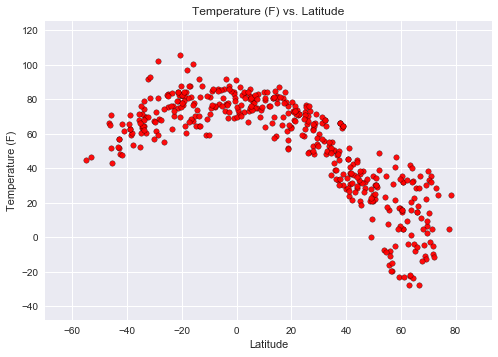

In [220]:
plt.show()

In [221]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], marker="o", 
            facecolors="red", edgecolors="black", alpha=0.95, s=30)
plt.ylim(weather_df['Humidity'].min() - 25, weather_df['Humidity'].max() + 25)
plt.xlim(weather_df['Latitude'].min()-15, weather_df['Latitude'].max()+15)

plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

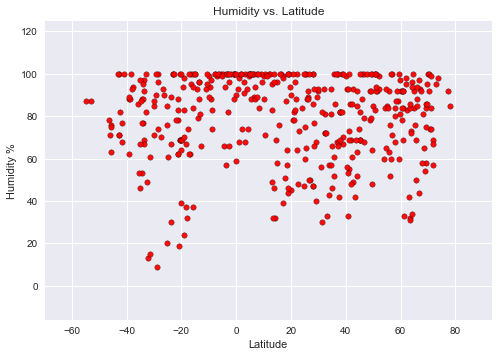

In [222]:
plt.show()

In [223]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], marker="o", 
            facecolors="red", edgecolors="black", alpha=0.95, s=30)
plt.ylim(weather_df['Wind Speed'].min() - 3, weather_df['Wind Speed'].max() + 3)
plt.xlim(weather_df['Latitude'].min()-15, weather_df['Latitude'].max()+15)

plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

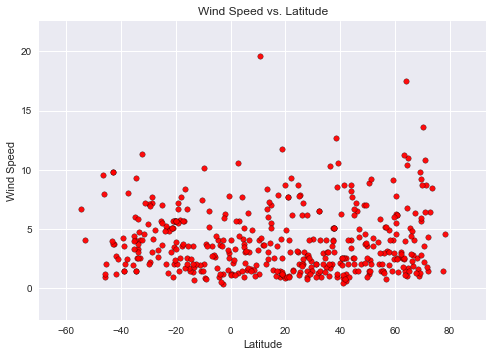

In [224]:
plt.show()

In [225]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], marker="o", 
            facecolors="red", edgecolors="black", alpha=0.95, s=30)
plt.ylim(weather_df['Cloudiness'].min() - 3, weather_df['Cloudiness'].max() + 3)
plt.xlim(weather_df['Latitude'].min()-15, weather_df['Latitude'].max()+15)

plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

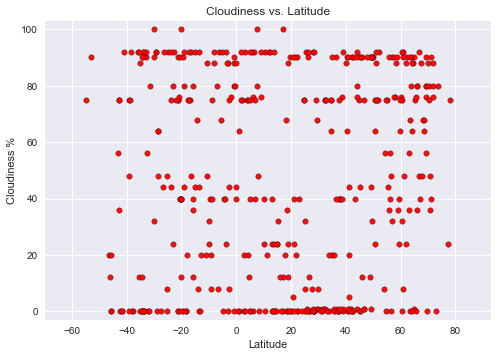

In [226]:
plt.show()